In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
retail = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/Introduction-to-Data-Analysis/master/Chapter08/Datasets/online_retail_II.csv')
retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [0]:

retail.rename(index = str, columns = {
    'Invoice' : 'invoice', 
    'StockCode' : 'stock_code', 
    'Quantity' : 'quantity', 
    'InvoiceDate' : 'date', 
    'Price' : 'unit_price', 
    'Country' : 'country', 
    'Description' : 'desc', 
    'Customer ID' : 'cust_id'
}, inplace = True)

retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


In [0]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525461 entries, 0 to 525460
Data columns (total 8 columns):
invoice       525461 non-null object
stock_code    525461 non-null object
desc          522533 non-null object
quantity      525461 non-null int64
date          525461 non-null object
unit_price    525461 non-null float64
cust_id       417534 non-null float64
country       525461 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [0]:
retail.isnull().sum().sort_values(ascending = False)

cust_id       107927
desc            2928
country            0
unit_price         0
date               0
quantity           0
stock_code         0
invoice            0
dtype: int64

In [0]:
retail.describe()

,quantity,unit_price,cust_id
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [0]:
retail.loc[retail['unit_price'] == 25111.090000]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
241824,C512770,M,Manual,-1,17/06/2010 16:52,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,17/06/2010 16:53,25111.09,NaN,United Kingdom


In [0]:
retail.loc[retail['unit_price'] == -53594.360000]

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
179403,A506401,B,Adjust bad debt,1,29/04/2010 13:36,-53594.36,NaN,United Kingdom


In [0]:
(retail['unit_price'] <= 0).sum()

3690

In [0]:
(retail['quantity'] <= 0).sum()

12326

In [0]:
((retail['unit_price'] <= 0) & (retail['quantity'] <= 0) & (retail['cust_id'].isnull())).sum()

2121

In [0]:
null_retail = retail[retail.isnull().any(axis=1)]
null_retail.head()


,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
263,489464,21733,85123a mixed,-96,01/12/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,01/12/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01/12/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,01/12/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,01/12/2009 11:49,0.55,NaN,United Kingdom


In [0]:
new_retail = retail.dropna()

In [0]:
new_retail = new_retail[(new_retail['unit_price'] > 0) & (new_retail['quantity'] > 0)]

In [0]:
new_retail.describe()

,quantity,unit_price,cust_id
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


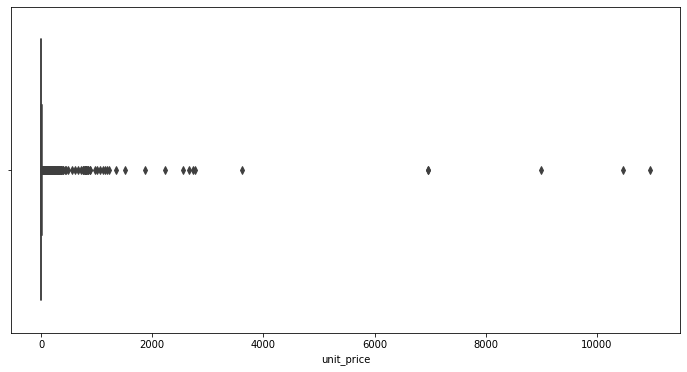

In [0]:

plt.subplots(figsize = (12, 6))
up = sns.boxplot(new_retail.unit_price)

In [0]:
new_retail = new_retail[retail.unit_price < 6000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [0]:

new_retail.describe()

,quantity,unit_price,cust_id
count,407659.000000,407659.000000,407659.000000
mean,13.585740,3.185750,15368.593562
std,96.841331,14.494341,1679.761725
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,3610.500000,18287.000000


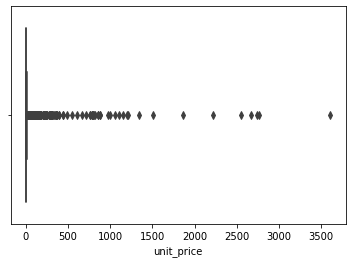

In [0]:
up_new = sns.boxplot(new_retail.unit_price)

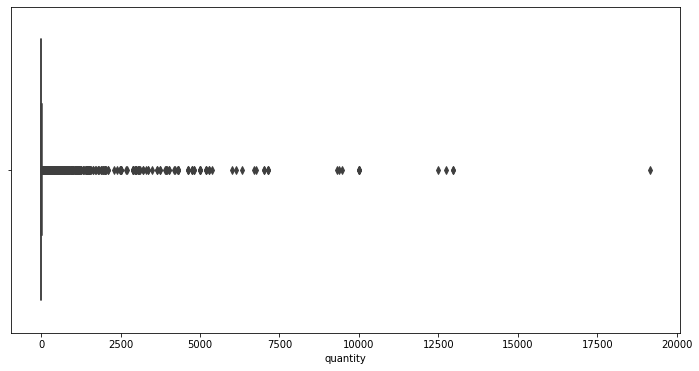

In [0]:
plt.subplots(figsize = (12, 6))
q = sns.boxplot(new_retail.quantity)

In [0]:
new_retail = new_retail[retail.quantity < 15000]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [0]:
new_retail.describe()


,quantity,unit_price,cust_id
count,407658.000000,407658.000000,407658.000000
mean,13.538792,3.185757,15368.597160
std,92.085647,14.494358,1679.762214
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,12960.000000,3610.500000,18287.000000


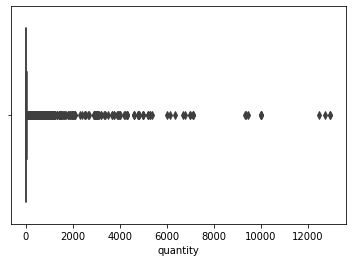

In [0]:
q_new = sns.boxplot(new_retail.quantity)

In [0]:
new_retail[(new_retail.desc.isnull()) & (new_retail.cust_id.isnull())]
new_retail.info()


<class 'pandas.core.frame.DataFrame'>
Index: 407658 entries, 0 to 525460
Data columns (total 8 columns):
invoice       407658 non-null object
stock_code    407658 non-null object
desc          407658 non-null object
quantity      407658 non-null int64
date          407658 non-null object
unit_price    407658 non-null float64
cust_id       407658 non-null float64
country       407658 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 28.0+ MB


In [0]:
retail = new_retail
retail.head()

,invoice,stock_code,desc,quantity,date,unit_price,cust_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
